In [1]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
#-------------------------
# step 1: Importing Libraries
#-------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 1: Data Exploration Documentation
This notebook explores and visualizes vaccine adverse event data. The following steps will help anyone understand the dataset and the analysis process:
- **Importing Libraries:** Essential Python libraries for data analysis and visualization are imported.
- **Loading Data:** The cleaned CSV file is loaded into a pandas DataFrame for further exploration.
- **Column Overview:** Key columns include unique identifiers, patient demographics, symptoms, vaccine details, and more.
- **Purpose:** The goal is to analyze patterns, distributions, and insights related to vaccine reports in the USA.
---

In [4]:
#------------------------------
# step 2 : Loading into the CSV
#------------------------------
cdf = pd.read_csv('datacleaned.csv',low_memory=True)

In [5]:
#------------------------------
# step 2.1 : Column Exploration
#------------------------------
cdf.head().T

,0,1,2,3,4
VAERS_ID,810053,810053,855017,855018,855018
STATE,OH,OH,HI,WI,WI
AGE_YRS,73.0,73.0,55.0,68.0,68.0
SEX,F,F,F,F,F
SYMPTOM_TEXT,Extreme shivering for approx. 5 hours then fev...,Extreme shivering for approx. 5 hours then fev...,Symptoms occurred almost immediately- aching j...,"Extreme pain, muscle weakness in right arm so ...","Extreme pain, muscle weakness in right arm so ..."
RECOVD,U,U,N,Y,Y
V_ADMINBY,PVT,PVT,MIL,PHM,PHM
FORM_VERS,2,2,2,2,2
ORDER,2,2,1,1,1
ORDER.1,2,2,1,1,1


# column exploration
- Vares stand for Vaccine Adverse Reporting System
- VARES ID --> Unique ID
- STATE --> states of USA
- AGE_YR --> age of the pateint
- SEX --> gender of the pateint
- SYMPTOM_TEXT - summary of the symptom and description
- RECOVD - Recoverd (U,Y,N)
- V_ADMINBY - Vaccine from
- FORM_VERS - VERS form
- ORDER - ORDER unwue value
- SYMPTOM1 - specific symptom
- SYMPTOM VERSION1 - the version of the symptom
- VAX_TYPE - the type of the vaxination
- VAX_MANU - the manufacturer of the particular vaccine
- VAX_ NAME - name of the vaccination


In [ ]:
#------------------------------
# step 2.2 : Data Types of the columns
#------------------------------
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127213 entries, 0 to 2127212
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VAERS_ID         int64  
 1   STATE            object 
 2   AGE_YRS          float64
 3   SEX              object 
 4   SYMPTOM_TEXT     object 
 5   RECOVD           object 
 6   V_ADMINBY        object 
 7   FORM_VERS        int64  
 8   ORDER            int64  
 9   ORDER.1          int64  
 10  SYMPTOM1         object 
 11  SYMPTOMVERSION1  float64
 12  VAX_TYPE         object 
 13  VAX_MANU         object 
 14  VAX_NAME         object 
dtypes: float64(2), int64(4), object(9)
memory usage: 243.4+ MB


In [ ]:
#------------------------------
# step 2.3 : The stastical  analysis of the data  
#------------------------------
cdf.describe()

,VAERS_ID,AGE_YRS,FORM_VERS,ORDER,ORDER.1,SYMPTOMVERSION1
count,2.127213e+06,2.127213e+06,2.127213e+06,2.127213e+06,2.127213e+06,2.127213e+06
mean,1.766222e+06,4.897507e+01,1.997842e+00,1.116961e+00,1.116961e+00,2.444672e+01
std,6.095242e+05,2.215260e+01,4.640149e-02,4.028517e-01,4.028517e-01,9.706579e-01
min,1.091280e+05,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.210000e+01
25%,1.216798e+06,3.300000e+01,2.000000e+00,1.000000e+00,1.000000e+00,2.400000e+01
50%,1.689184e+06,5.200000e+01,2.000000e+00,1.000000e+00,1.000000e+00,2.400000e+01
75%,2.322967e+06,6.600000e+01,2.000000e+00,1.000000e+00,1.000000e+00,2.500000e+01
max,2.851140e+06,1.190000e+02,2.000000e+00,1.000000e+01,1.000000e+01,2.800000e+01


In [ ]:
#------------------------------
# step 2.4 : checkin for the null values
#------------------------------
cdf.isnull().sum()

VAERS_ID           0
STATE              0
AGE_YRS            0
SEX                0
SYMPTOM_TEXT       0
RECOVD             0
V_ADMINBY          0
FORM_VERS          0
ORDER              0
ORDER.1            0
SYMPTOM1           0
SYMPTOMVERSION1    0
VAX_TYPE           0
VAX_MANU           0
VAX_NAME           0
dtype: int64

## Age bins
- creating age bins


In [ ]:
#------------------------------
# step 3 : Creating age bins
#------------------------------
bins = list(range(0, 121, 10))
labels = [f'{i}-{i+9}' for i in bins[:-1]]

cdf['Age_grp'] = pd.cut(cdf['AGE_YRS'], bins=bins, labels=labels, right=False)

In [24]:
#----------------------------------------
# step 3.1 : Checking The Age_grp columns
#----------------------------------------
cdf['Age_grp'].head()

0    70-79
1    70-79
2    50-59
3    60-69
4    60-69
Name: Age_grp, dtype: category
Categories (12, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '80-89' < '90-99' < '100-109' < '110-119']

# Step 3.1: Checking The Age_grp Columns
This cell checks the newly created age group column (`Age_grp`) to ensure the binning process was successful and to preview the first few entries.

# Demographic Insights
- Count of the each gender 
- Gender categories

In [25]:
Gender_Distribution = cdf.groupby('SEX').size().reset_index(name='count')
Gender_Distribution

,SEX,count
0,F,1333443
1,M,691669
2,U,102101


AttributeError: module 'matplotlib.pyplot' has no attribute 'pltis'

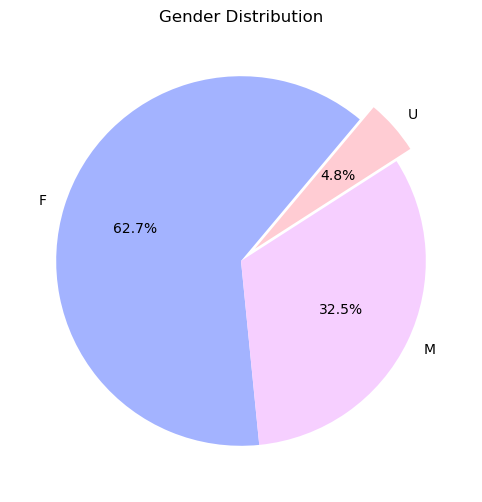

In [13]:
plt.figure(figsize=(16, 6))
plt.pie(
    x=Gender_Distribution['count'],
    labels=Gender_Distribution['SEX'],
    explode=[0,0,0.1],
    autopct='%1.1f%%',
    startangle=50,
    colors=['#A3B3FF','#F6CFFF','#FFCCD3'],
    )
plt.title("Gender Distribution")
plt.pltis('equal')
plt.show()

### Gender Distribution Visualization
This pie chart visualizes the distribution of genders in the vaccine report dataset. It helps to understand the proportion of male, female, and unknown gender cases, providing insights into demographic patterns.

In [26]:
Age_Distribution = cdf['Age_grp'].value_counts().rename('Count').reset_index()
Age_Distribution

,Age_grp,Count
0,60-69,380407
1,50-59,346651
2,40-49,286098
3,70-79,277772
4,30-39,273792
5,20-29,169722
6,10-19,145015
7,0-9,116186
8,80-89,106946
9,90-99,23837


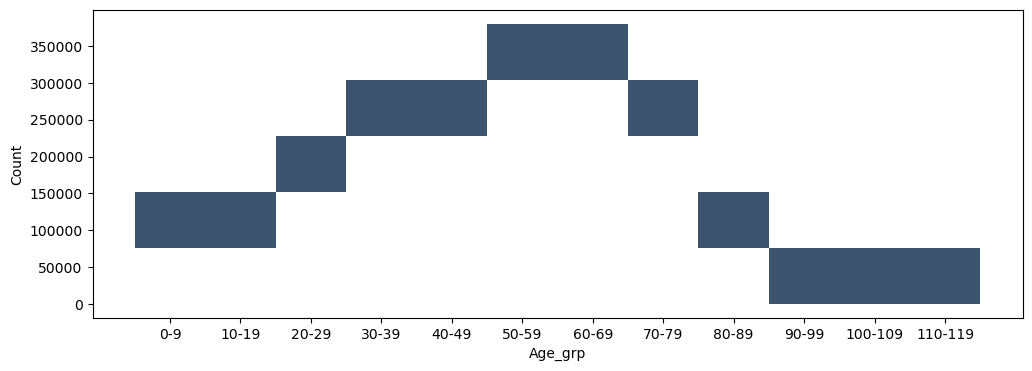

In [16]:
plt.figure(figsize=(12,4))
sns.histplot(x=Age_Distribution['Age_grp'],y=Age_Distribution['Count'])
plt.show()

### Age Distribution Histogram
This histogram shows the distribution of vaccine reports across different age groups. It helps identify which age ranges have the highest number of reports and highlights any age-related trends in the data.

In [17]:
Age_Gender = cdf.pivot_table(index='Age_grp', columns='SEX', values='VAERS_ID', aggfunc='count')

C:\Users\NAGENDRA BABU\AppData\Local\Temp\ipykernel_6468\2275384151.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  Age_Gender = cdf.pivot_table(index='Age_grp', columns='SEX', values='VAERS_ID', aggfunc='count')


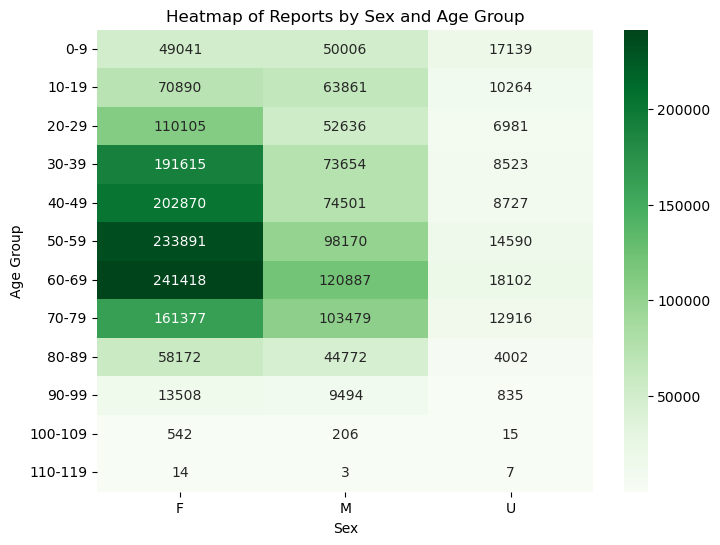

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(Age_Gender, annot=True,fmt='d', cmap='Greens')
plt.title('Heatmap of Reports by Sex and Age Group')
plt.xlabel('Sex')
plt.ylabel('Age Group')
plt.show()

### Age and Gender Heatmap
This heatmap visualizes the relationship between age groups and gender in the vaccine report data. It shows the count of reports for each combination, helping to spot patterns and differences across demographics.

# Geographical Insights

In [19]:
Top_States_Gender = (
    cdf.groupby('STATE')
       .size()
       .reset_index(name='count').sort_values(by='count',ascending=False)
)


In [27]:
Top_10_States_Gender=Top_States_Gender[1:11]
Top_10_States_Gender

,STATE,count
5,CA,198050
50,TX,111999
10,FL,110338
39,NY,105207
26,MI,103717
43,PA,74459
17,IL,62710
40,OH,61388
36,NJ,54742
56,WA,53521


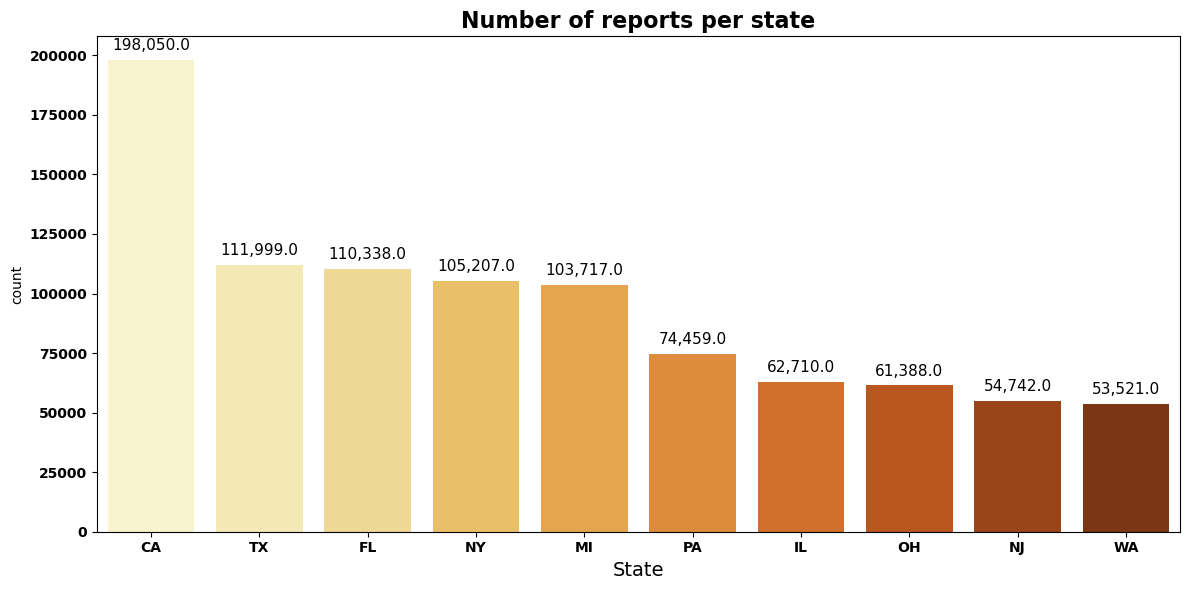

In [22]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('YlOrBr', n_colors=len(Top_10_States_Gender))


barplot = sns.barplot(
    x='STATE',
    y='count',
    data=Top_10_States_Gender,
    palette=colors,
    hue='STATE')

for i, bar in enumerate(barplot.patches):
    barplot.annotate(
        format(bar.get_height(), ','),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom',
        fontsize=11,
        color='black',
        xytext=(0, 5),
        textcoords='offset points')

plt.title('Number of reports per state', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=14)

plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

barplot.get_legend().remove() if barplot.get_legend() else None

plt.tight_layout()

plt.show()


### State-wise Report Bar Plot
This bar plot displays the number of vaccine reports for the top states. It helps identify which states have the highest reporting rates and may indicate regional trends or differences in vaccine experiences.

In [23]:
fig = px.choropleth(
    Top_States_Gender[1:],
    locations='STATE',
    locationmode="USA-states",
    color='count',
    hover_name='STATE',
    color_continuous_scale="Reds",
    labels={'COUNT': 'Report Count'},
    title="Choropleth Map of Vaccine Reports by State"
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(margin={"r":1,"t":10,"l":0,"b":0})

fig.show()

### Choropleth Map of Vaccine Reports by State
This map visualizes the geographic distribution of vaccine reports across the USA. It uses color intensity to show the number of reports per state, making it easy to spot areas with higher or lower reporting rates.

----

# Vaccine Type Analysis

In [ ]:
Vaccine_Distribution = cdf.groupby('VAX_TYPE').size().rename('Count').reset_index()

### Vaccine Distribution Analysis
This step groups the data by vaccine type to analyze how many reports are associated with each vaccine. It helps identify which vaccines have the most reported events.

In [ ]:
Top_10_Vaccine_Used = Vaccine_Distribution.sort_values(by='Count',ascending=False).head(20)

### Top Vaccines Used
This step sorts the vaccine distribution data to find the top vaccines with the highest number of reports. It helps focus the analysis on the most frequently reported vaccines.

In [ ]:
Top_10_Vaccine_Used

,VAX_TYPE,Count
6,COVID19,1699449
85,VARZOS,73681
7,COVID19-2,59946
24,FLU4,35637
83,UNK,31802
79,TDAP,14056
44,HPV9,14013
70,RSV,11850
84,VARCEL,11444
33,FLUX,10381


### Display Top Vaccines Data
This cell displays the top vaccines data, showing the vaccine types and their associated report counts for further visualization and analysis.

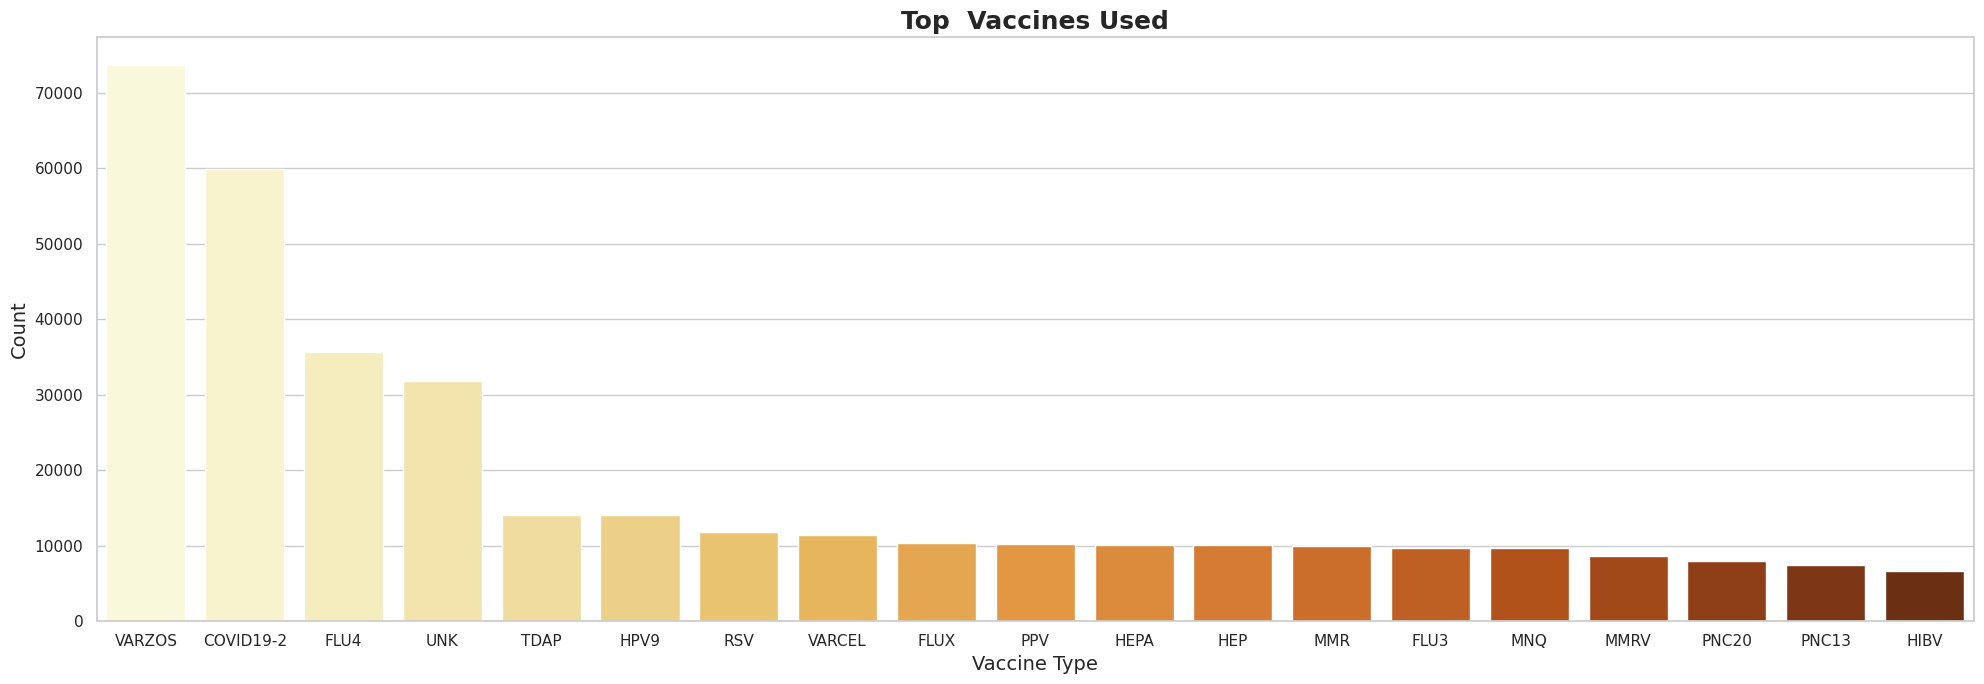

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x=Top_10_Vaccine_Used['VAX_TYPE'][1:],y=Top_10_Vaccine_Used['Count'][1:],palette='YlOrBr',
            hue=Top_10_Vaccine_Used['VAX_TYPE'][1:])
plt.title("Top  Vaccines Used", fontsize=18, weight='bold')
plt.xlabel("Vaccine Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()

### Visualize Top Vaccines Used
This cell creates a bar plot to visualize the top vaccines used, making it easy to compare their report counts and identify trends.

In [ ]:
from wordcloud import WordCloud

### Import WordCloud Library
This cell imports the WordCloud library, which will be used for generating word clouds from text data in subsequent analysis.